<a href="https://colab.research.google.com/github/VitorBenevides/lia1_2024_2/blob/main/Construindo%20um%20modelo%20com%20Keras/Aula_12_Construindo_um_modelo_com_TensorFlow_Cifar10ds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto Ponta a Ponta - Construindo um Modelo com Tensorflow -  Cifar-10**

**Problema:** construir um modelo de Inteligência Artificial capaz de classificar imagens, considerando 10 categorias, sendo: *airplane; automobile; bird; cat; deer; dog; frog; horse; ship; truck*.

**Não há mágica. Há matemática!** 🧙

**Fonte de dados**

O conjunto de dados [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) é uma coleção de imagens comumente usadas para treinar algoritmos de aprendizado de máquina e visão computacional. É um dos conjuntos de dados mais amplamente utilizados para pesquisa de aprendizado de máquina.

In [1]:
# Importando o necessário
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

**Carregando os dados de Treino e Teste**

In [2]:
# Carrega o dataset CIFAR-10 - Já está no Keras!
# Todos os DS no Keras -> https://keras.io/api/datasets/
(imagens_treino, labels_treino), (imagens_teste, labels_teste) = datasets.mnist.load_data(path="mnist.npz")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Classes das imagens
nomes_classes = ['Zero','Um', 'Dois', 'Três', 'Quatro', 'Cinco', 'Seis', 'Sete', 'Oito', 'Nove']

**Pré-processamento**

Fazer pré-processamento nos dados, em nosso caso as imagens.

In [4]:
# Normaliza os valores dos pixels para que os dados fiquem na mesma escala
imagens_treino = imagens_treino / 255.0
imagens_teste = imagens_teste / 255.0

In [7]:
# Função para exibir as imagens
def visualiza_imagens(images, labels):
    plt.figure(figsize = (10,10))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap = plt.cm.binary)
        plt.xlabel(nomes_classes[labels[i]])
    plt.show()

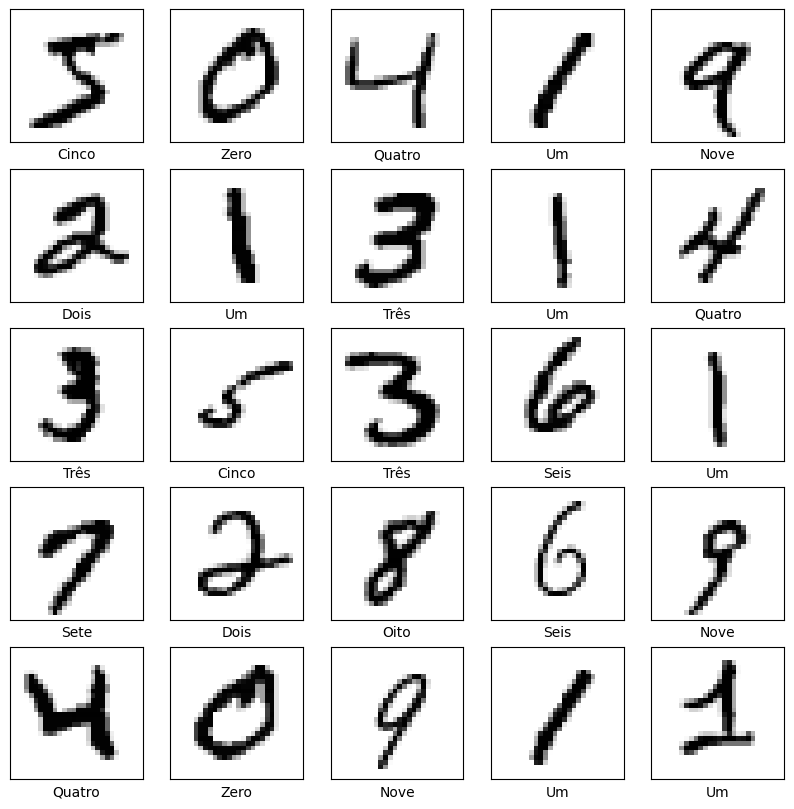

In [8]:
# Executa a função
visualiza_imagens(imagens_treino, labels_treino)

**Construindo a Rede Neural Convolucional**

O Keras é uma biblioteca do TensorFlow.

In [13]:
# Arquitetura do Modelo -> Feature Learning

# Cria o objeto de sequência de camadas - do Keras
modelo_lia = models.Sequential()

# Adiciona a primeira camada de convolução e max pooling (camada de entrada)
modelo_lia.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
modelo_lia.add(layers.MaxPooling2D((2, 2)))

# Adiciona a segunda camada de convolução e max pooling (camada intermediária)
modelo_lia.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
modelo_lia.add(layers.MaxPooling2D((2, 2)))

# Adiciona a terceira camada de convolução e max pooling (camada intermediária)
modelo_lia.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
modelo_lia.add(layers.MaxPooling2D((2, 2)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# Adicionar camadas de classificação - Converte para um vetor - flatten
modelo_lia.add(layers.Flatten())
modelo_lia.add(layers.Dense(64, activation = 'relu'))
modelo_lia.add(layers.Dense(10, activation = 'softmax'))

In [15]:
# Compilação do modelo
modelo_lia.compile(optimizer = 'adam',
                   loss = 'sparse_categorical_crossentropy',
                   metrics = ['accuracy'])

# adam - é um algoritmo de aprendizagem tipo backpropagation!
# loss - função de erro. Isso se resume a uma otimização função matemática!
# metrics - medir o sucesso!

**Treinamento**

In [16]:
# Executando o treinamento
%%time
history = modelo_lia.fit(imagens_treino,
                         labels_treino,
                         epochs = 10,
                         validation_data = (imagens_teste, labels_teste))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8429 - loss: 0.4900 - val_accuracy: 0.9766 - val_loss: 0.0781
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9741 - loss: 0.0852 - val_accuracy: 0.9827 - val_loss: 0.0593
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9817 - loss: 0.0591 - val_accuracy: 0.9813 - val_loss: 0.0625
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9854 - loss: 0.0478 - val_accuracy: 0.9770 - val_loss: 0.0732
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9895 - loss: 0.0344 - val_accuracy: 0.9861 - val_loss: 0.0499
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9908 - loss: 0.0293 - val_accuracy: 0.9873 - val_loss: 0.0460
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9935 - loss: 0.0213 - val_accuracy: 0.9847 - val_loss: 0.0555
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9933 - loss: 0.019

Treinamento concluído com sucesso! 💪 Observe se ao final de cada época a acurácia aumenta.

**Previsão - Testar o modelo (Deploy)**

Testar o modelo treinado com imagens que ele ainda não viu. Por fim, verificamos o resultado da previsão e emitimos a informação sobre a classe.

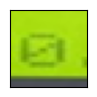

In [18]:
# Carrega uma nova imagem
nova_imagem = Image.open("/content/zero.jpg")

# Redimensiona para 32x32 pixels
nova_imagem = nova_imagem.resize((28, 28))

# Exibir a imagem
plt.figure(figsize = (1,1))
plt.imshow(nova_imagem)
plt.xticks([])
plt.yticks([])
plt.show()


In [26]:
nova_imagem = nova_imagem.convert('L')  # Convert to grayscale
# Converte a imagem para um array NumPy e normaliza
nova_imagem_array = np.array(nova_imagem) / 255.0

In [27]:
# Expande a dimensão do array para que ele tenha o formato (1, 32, 32, 3)
nova_imagem_array = np.expand_dims(nova_imagem_array, axis = 0)
nova_imagem_array = np.expand_dims(nova_imagem_array, axis = 3)

In [28]:
# Fazendo a previsão!
previsoes = modelo_lia.predict(nova_imagem_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 621ms/step


In [29]:
print(previsoes)

[[0.19384395 0.12600514 0.0694427  0.08160646 0.06936987 0.09620875
  0.11850694 0.08168025 0.09907631 0.06425977]]


In [30]:
# Obtém a classe com maior probabilidade e o nome da classe
classe_prevista = np.argmax(previsoes)
nome_classe_prevista = nomes_classes[classe_prevista]

In [31]:
print("A nova imagem foi classificada como:", nome_classe_prevista)

A nova imagem foi classificada como: Zero


Fim! 🔥